# Chaînes de Markov : propagation d’une épidémie dans une population
Groupe 3

**Haya MAMLOUK** - 21107689

**Maeva RAMAHATAFANDRY** - 21104443


## 1. Description du premier modèle

1. Dans le cadre de ce modèle épidémique:
- il y'a 3 états: **Sain (S), Infecté (I) et Guéri (R)**. 
- Le vecteur de probabilité initiale est de taille 3 représentant chaque état au temps 0. 
- La matrice de transition est de taille 3 x 3: on peut rentrer selon 3 états (S, I , R) et sortir selon 3 états. 

2. pi0 : vecteur de probabilité initiale:


``` python
    pi0 = [0.9, 0.1, 0.0]
```


3. Matrice de transition 1 contenant les probabilités de transition entre les différentes états:

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])
```



In [65]:
# PARAMÈTRES DU CODE
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

pi0 = [0.9, 0.1, 0.0]

A = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])


In [66]:
def est_stochastique(A):
    """
    Cette fonction renvoie 1 si A est une matrice stochastique (matrice carrée et la somme des éléments d'une ligne  = 1) et 0 sinon

    Paramètres: 
    ------------
    A : np.array
    Matrice à vérifier

    Returns:
    ------------
    boolean

    """
    sum : int = 0
    if A.shape[0] == A.shape[1]: 
        for i in A: #i = valeur ligne, j = valeur colonne
            for j in i:
                sum += j
            if sum != 1:
                return False
            else :
                sum = 0
        return True
    return False

assert(est_stochastique(A) == True)


### 1.1 Distribution théorique

#### Question 1 : Calcul de la distribution théoriques des états pour t = 1

La probabilité pour un individu d'être **sain** au temps t = 1 est:

$ P(S_1) = P(S_1 | S_0) * P(S_0) = 0.9 * 0.92 = 0.828 $


La probabilité pour un individu d'être **infecté** au temps t = 1 est: 

$   P(I_1) = P(I_1| S_0) * P(S_0) + P(I_1 | I_0) * P(I_0) = 0.08 * 0.9 + 0.93 * 0.1  = 0.072 + 0.093 = 0.165 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_1) = P(R_1 | I_0) * P(I_0) = 0.07 * 0.1 = 0.007 $



#### Question 2 : Calcul de la distribution théoriques des états pour t = 2

La probabilité pour un individu d'être **sain** au temps t = 2 est:

$   P(S_2) = P(S_2 | S_1) * P(S_1) =  0.92 * 0.828 = 0.762 $ 


La probabilité pour un individu d'être **infecté** au temps t = 2 est: 

$   P(I_2) = P(I_2| S_1) * P(S_1) + P(I_2 | I_1) * P(I_1) = 0.08 * 0.828 + 0.93 * 0.165 = 0.06624 + 0.15345 = 0.21969 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_2) = P(R_2| I_1) * P(I_1) + P(R_2 | R_1) * P(R_1) = 0.07 * 0.165 + 0.007 * 1 = 0.01855 $


#### Question 3: Calcul des distributions théoriques des états pour t entre 1 et 200

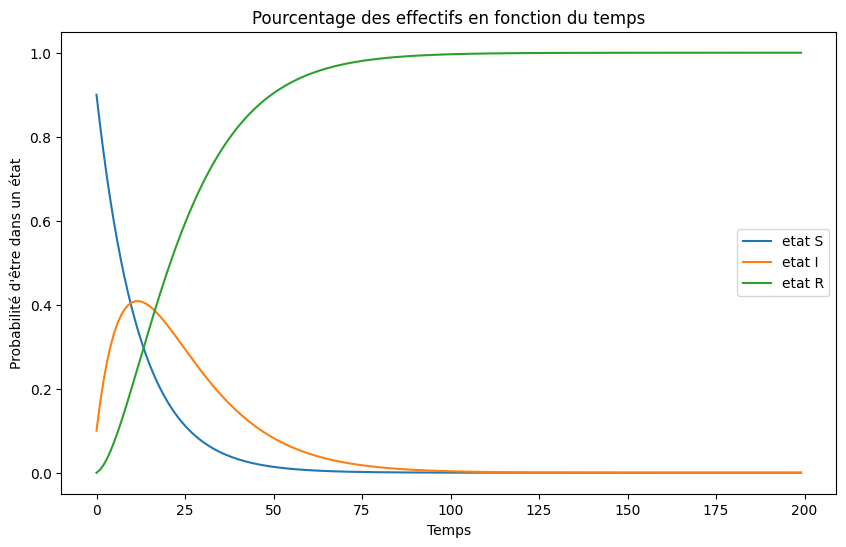

In [67]:
def distribution_etat(A, vect_init):
    liste_distribution = []
    liste_distribution.append(np.array(vect_init))

    for i in range(1, 200): 
        liste_distribution.append(np.dot(liste_distribution[i-1], A))

    return liste_distribution

def affichage_distribution(liste_distribution) :
    #affichage (to review bc copier coller from chatgpt)
    time_steps = np.arange(len(liste_distribution))
    state_labels = ['etat S', 'etat I', 'etat R']
    plt.figure(figsize=(10, 6))
    for state_index in range(len(liste_distribution[0])):
        state_probabilities = [distribution[state_index] for distribution in liste_distribution]
        plt.plot(time_steps, state_probabilities, label=state_labels[state_index])

    plt.title('Pourcentage des effectifs en fonction du temps')
    plt.xlabel('Temps')
    plt.ylabel("Probabilité d'être dans un état")
    plt.legend()
    plt.show()

liste_distribution = distribution_etat(A, pi0)
affichage_distribution(liste_distribution)

### 1.2 Distibution Observée
#### 1.2.1 Tirage aléatoire des états

In [68]:
def seq_alea_individu(T, pi0, transition) :

    states  = ['S', 'I', 'R']
    res = [random.choices(states, weights=pi0, k=1)[0]]

    transition_weights = {'S': transition[0], 'I': transition[1], 'R': transition[2]}

    for i in range(1, T + 1):
        current_state = res[i - 1]
        next_state = random.choices(states, weights=transition_weights[current_state], k=1)[0]
        res.append(next_state)
    return res
    
seq_alea_individu(150, pi0, A)

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

#### 1.2.2 Modélisation d’une population
##### Question 1 : Nombre d'individus sains, infectés et guéris et répartition de la population

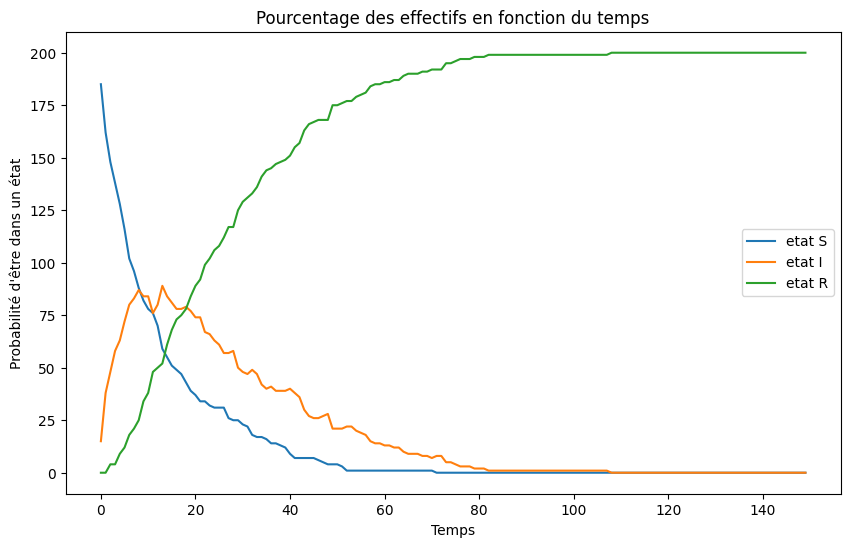

In [69]:
def seq_alea_population(nb_individus, temps, pi0, A):
    res = []
    for i in range(nb_individus+1):
        res.append(seq_alea_individu(temps, pi0, A))
    return res

def distribution_population(seq_population : list(list()), temps, nb_individus):
    res = []

    for j in range(temps):
        tab_temps = np.zeros(3)
        for i in range(nb_individus):
            if seq_population[i][j] == 'S':
                tab_temps[0] += 1
            elif seq_population[i][j] == 'I':
                tab_temps[1] += 1
            else:
                tab_temps[2] += 1
        res.append(tab_temps)
        
    return res

#tests
population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
affichage_distribution(distribution)

##### Question 2: Affichage des pourcentages

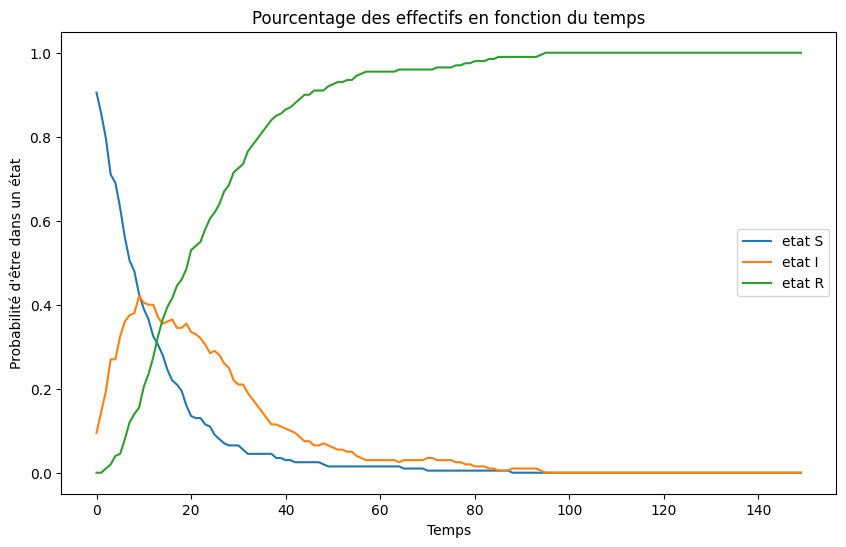

In [70]:
def pourcentages_population(repartition_population, nb_individus):
    for temps in repartition_population:
        for i in range(3):
            temps[i] /= nb_individus
    return repartition_population

population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
pourcentages = pourcentages_population(distribution, 200)
affichage_distribution(pourcentages)

##### Question 3
Quand t est très grand, la globalité de la population converge vers R: le nombre d'individus sains et infectés se rapprochent de 0% et le pourcentage d'invividus guéris se rapprochent de 100%. R est un état récurrent.

##### Question 4: expérience avec une population de 5 individus et 5000

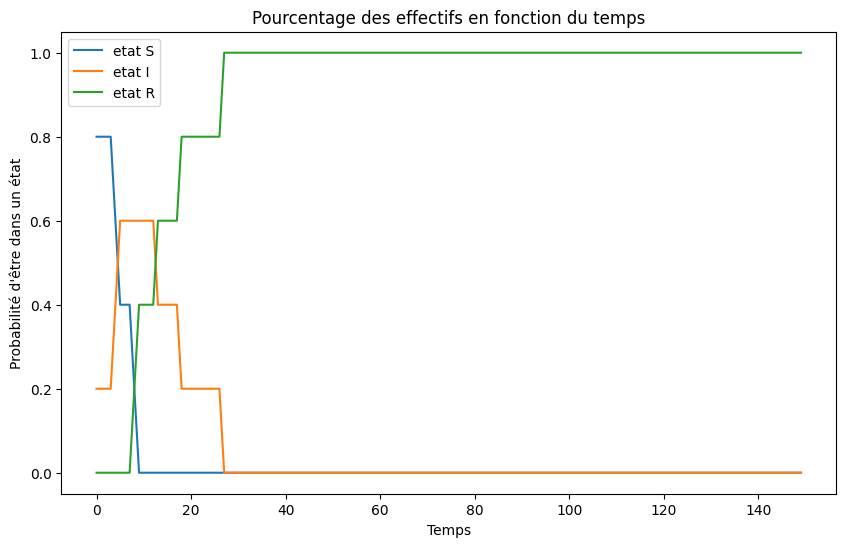

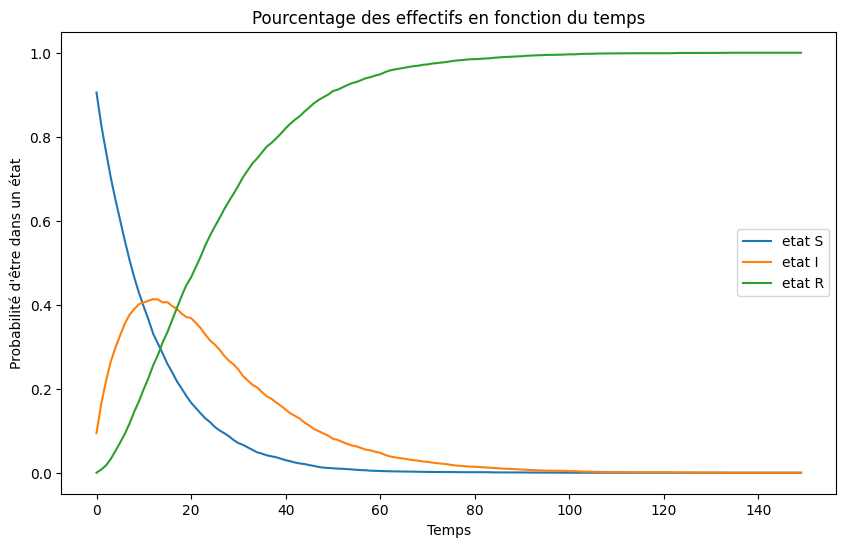

In [71]:
def experience(nb_individus, temps):
    population = seq_alea_population(nb_individus, temps, pi0, A)
    distribution = distribution_population(population, temps, nb_individus)
    pourcentages = pourcentages_population(distribution, nb_individus)
    return pourcentages

# avec 5 individus:
affichage_distribution(experience(5, 150))

# avec 5000 individus
affichage_distribution(experience(5000, 150))

## 1.3 Longueur de l'infection
##### Question 1: Longueur moyenne d'une séquence de I

In [72]:
def longueur_I_obs(nb_essais):
    I_moyen = []
    for i in range(nb_essais):
        pop = seq_alea_population(200, nb_essais, pi0, A)
        total_inf = 0 
        
        for seq in pop:
            seq_inf = [etat for etat in seq if etat == 'I']
            inf = len(seq_inf)
            total_inf += inf  #nb seq 'I' pour chaque individu
        
        moyenne_inf = total_inf / len(pop)  # moyenne pour le temps nb_essai
        I_moyen.append(moyenne_inf)  

    return statistics.mean(I_moyen)

longueur_I_obs(300)
    
    

14.261210613598672

##### Question 2: Longueur théorique d'une séquence I